In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host='localhost',
                           username='root',
                           password='1234',
                           database='user_profiling')
cur=db.cursor()

# Device Usage Distribution

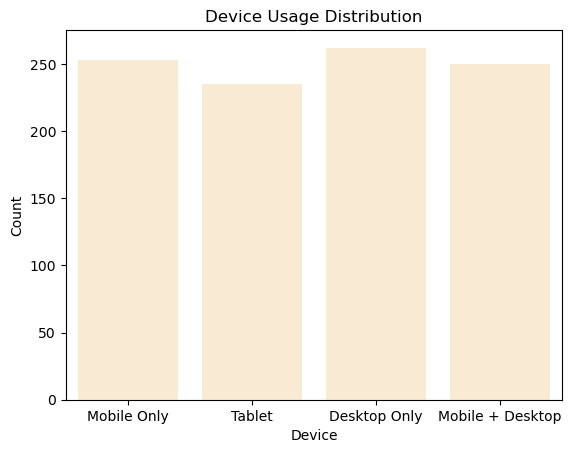

In [138]:
query="""select distinct(device_usage),count(user_id)
from user_profiles_for_ads group by device_usage"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Device','Count'])
colors=['moccasin','papayawhip','blanchedalmond','navajowhite']
sns.barplot(x=df['Device'],y=df['Count'],color='blanchedalmond')
plt.title('Device Usage Distribution')
plt.show()

# Top 10 User Interests

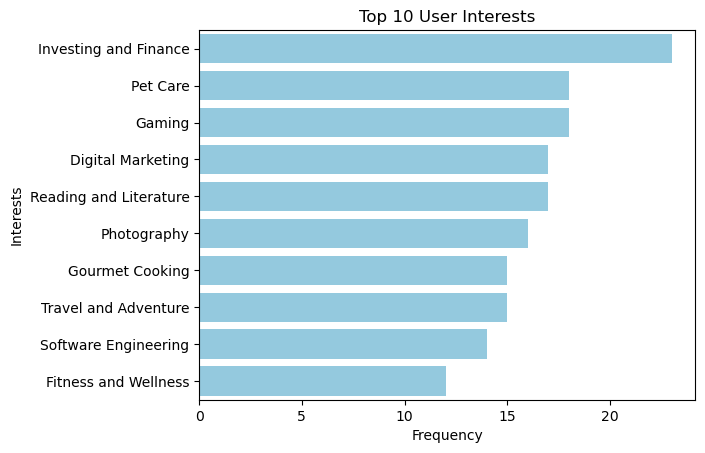

In [136]:
query="""select distinct(Top_Interests),count(Top_Interests) as counts
from user_profiles_for_ads group by Top_Interests
order by counts desc limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Interests','Frequency'])
sns.barplot(x=df['Frequency'],y=df['Interests'],color='skyblue')
plt.title('Top 10 User Interests')
plt.show()

# Top interests

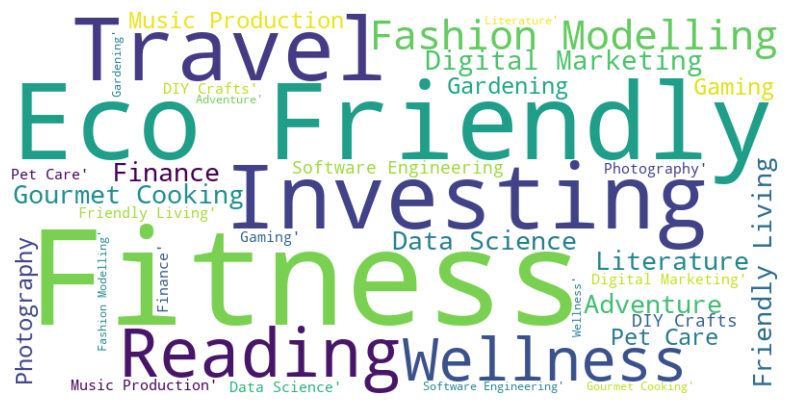

In [104]:
from wordcloud import WordCloud
query="""select distinct(Top_Interests)
from user_profiles_for_ads"""
cur.execute(query)
data=cur.fetchall()
data1=str(data)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Gender Distribution

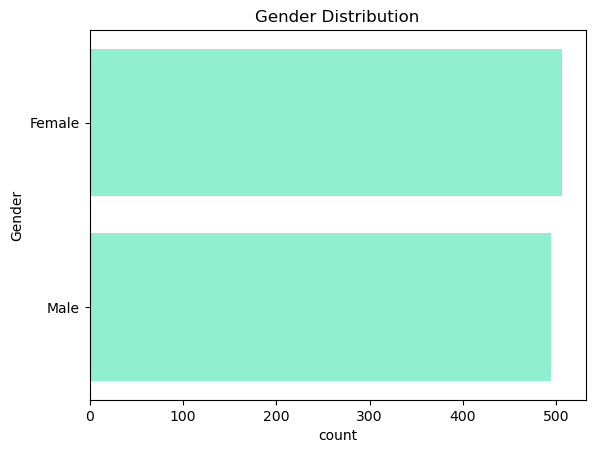

In [171]:
query="""select distinct(gender),count(gender)
from user_profiles_for_ads group by gender"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Gender','count'])
sns.barplot(x=df['count'],y=df['Gender'],color='aquamarine')
plt.title('Gender Distribution')
plt.show()

# Age Distribution

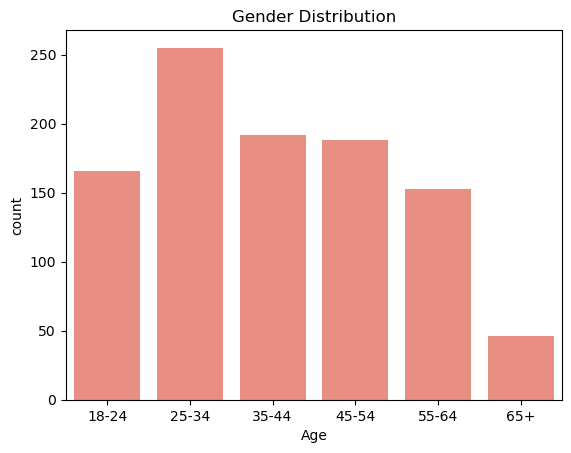

In [169]:
query="""select distinct(age),count(age)
from user_profiles_for_ads group by age order by age"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Age','count'])
sns.barplot(x=df['Age'],y=df['count'],color='salmon')
plt.title('Gender Distribution')
plt.show()

# User Education

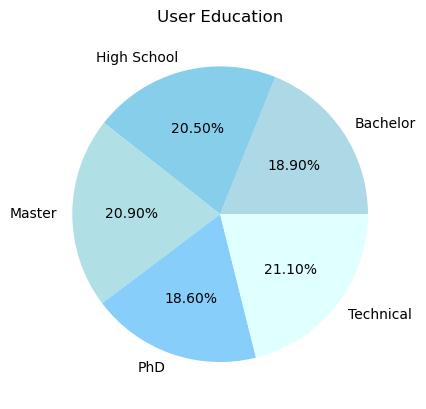

In [186]:
query="""select distinct(education_level),count(education_level)
from user_profiles_for_ads group by education_level order by education_level"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Education_level','count'])
value=df['count']
legend=df['Education_level']
plt.pie(value,labels=legend,autopct="%2.2f%%",colors=["lightblue","skyblue","powderblue","lightskyblue","lightcyan"])
plt.title('User Education')
plt.show()

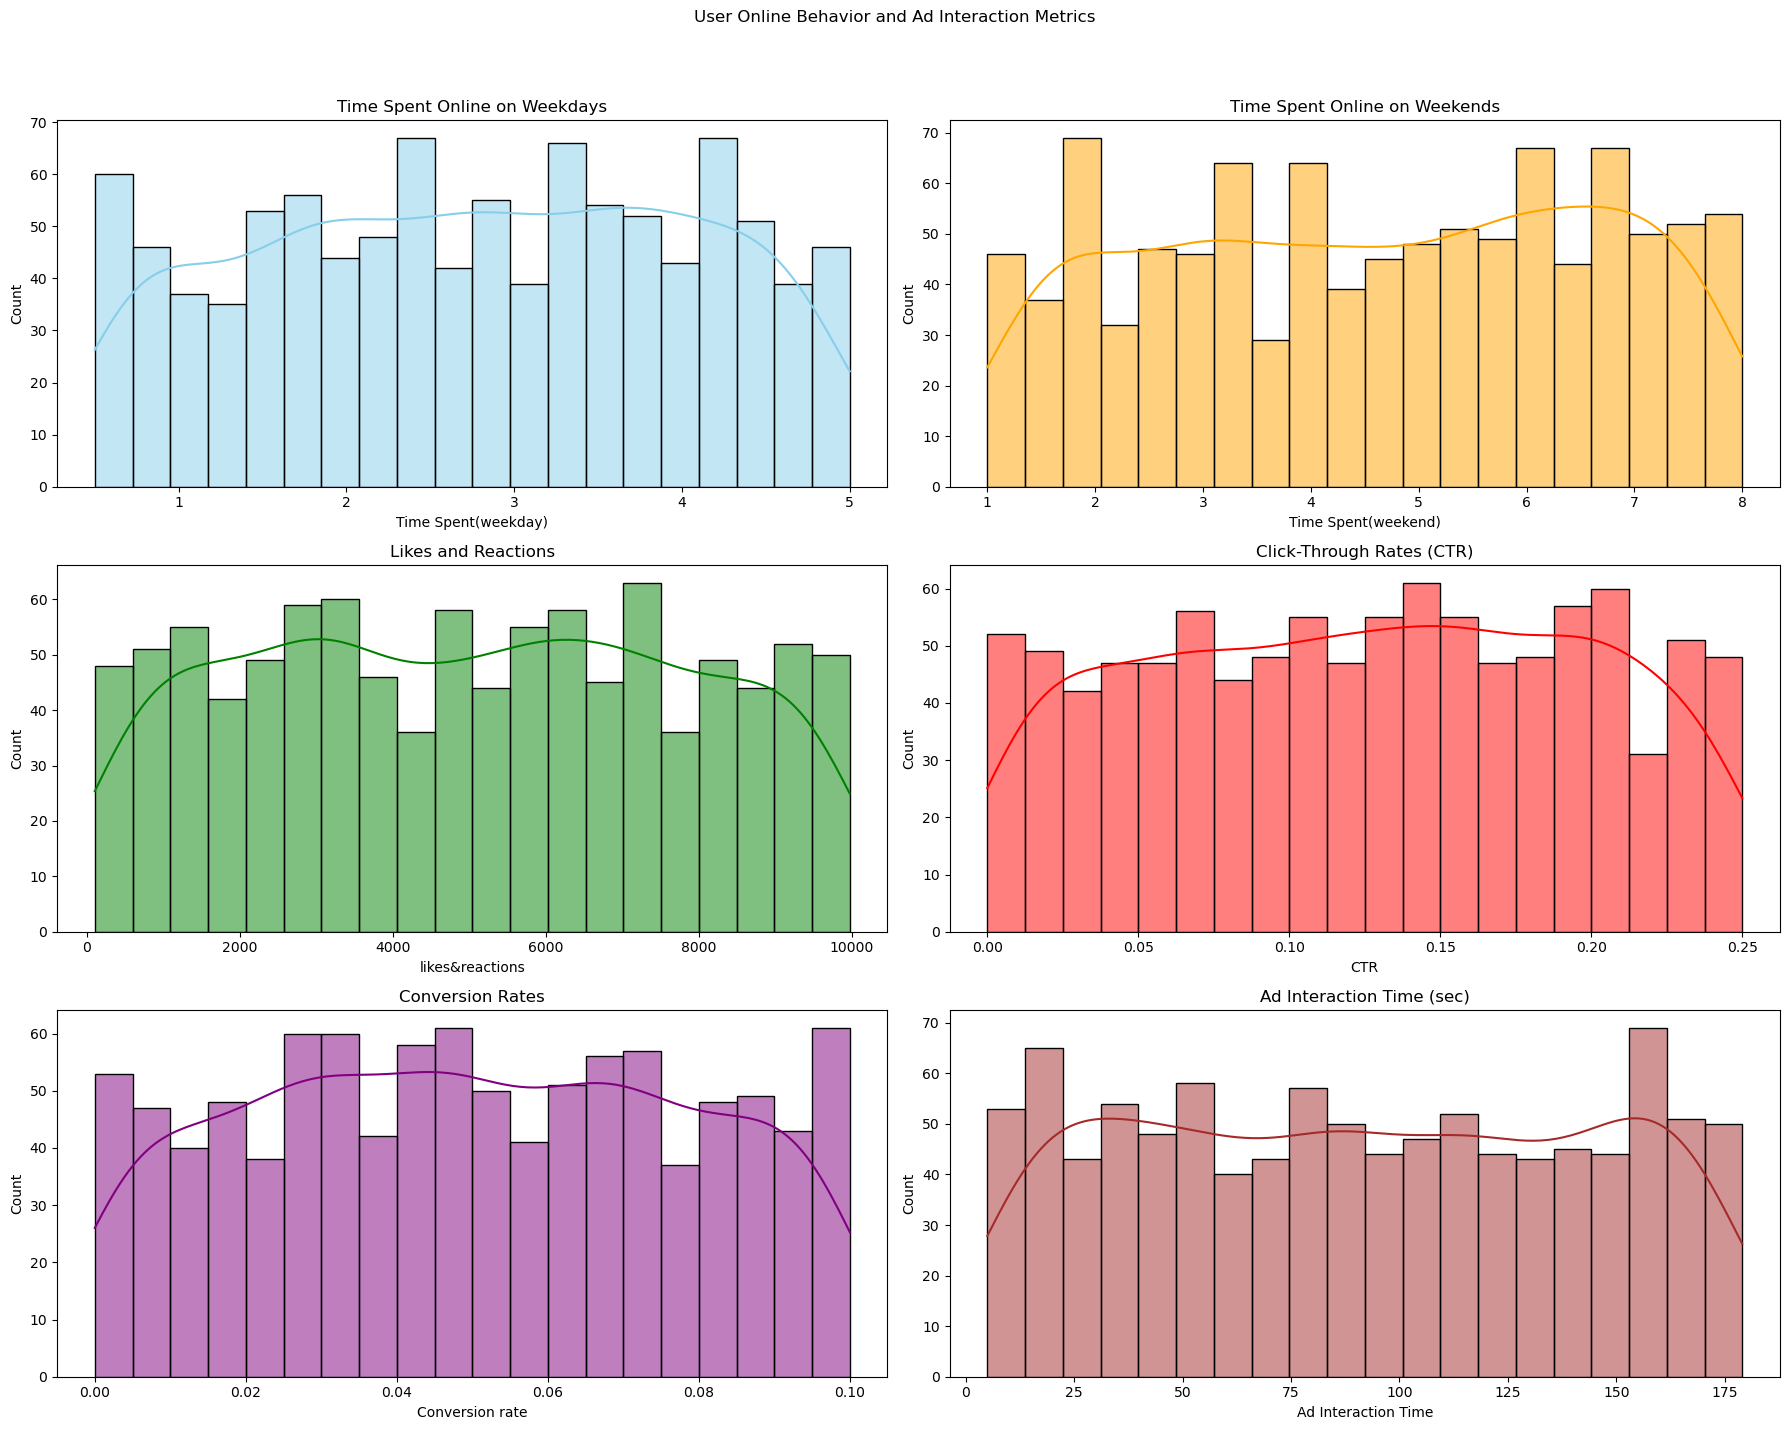

In [11]:
query="""select time_spent_online_hrs_weekday, time_spent_online_hrs_weekend,
likes_and_reactions,click_through_rate_ctr, conversion_rates, ad_interaction_time_sec
from user_profiles_for_ads"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Time Spent(weekday)','Time Spent(weekend)','likes&reactions','CTR','Conversion rate','Ad Interaction Time'])
# creating subplots for user online behavior and ad interaction metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('User Online Behavior and Ad Interaction Metrics')

# time spent online on weekdays
sns.histplot(ax=axes[0, 0], x='Time Spent(weekday)', data=df, bins=20, kde=True, color='skyblue')
axes[0, 0].set_title('Time Spent Online on Weekdays')

# time spent online on weekends
sns.histplot(ax=axes[0, 1], x='Time Spent(weekend)', data=df, bins=20, kde=True, color='orange')
axes[0, 1].set_title('Time Spent Online on Weekends')

# likes and reactions
sns.histplot(ax=axes[1, 0], x='likes&reactions', data=df, bins=20, kde=True, color='green')
axes[1, 0].set_title('Likes and Reactions')

# click-through rates
sns.histplot(ax=axes[1, 1], x='CTR', data=df, bins=20, kde=True, color='red')
axes[1, 1].set_title('Click-Through Rates (CTR)')

# conversion rates
sns.histplot(ax=axes[2, 0], x='Conversion rate', data=df, bins=20, kde=True, color='purple')
axes[2, 0].set_title('Conversion Rates')

# ad interaction time
sns.histplot(ax=axes[2, 1], x='Ad Interaction Time', data=df, bins=20, kde=True, color='brown')
axes[2, 1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()